# Constant bidding

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')
validationdata = pd.read_csv('validation.csv')

In [36]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
        
    for click, pay_price in validationdata[['click','payprice']].values:
            if constant > pay_price:
                impression += 1
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

In [37]:
const = pd.DataFrame()
const['constants'] = np.arange(1,300,1)

im = []
click = []
costs = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    click.append(clicks)
    costs.append(cost)
const['impressions'] = im
# const.impressions = const.impressions.astype(int)
const['costs'] = costs
const['clicks'] = click
const['CTR'] = (const.clicks/const.impressions * 100).round(4).astype(str)

In [38]:
print(const)

     constants  impressions      costs  clicks     CTR
0            1         82.0        0.0       0     0.0
1            2        373.0      291.0       0     0.0
2            3        851.0     1247.0       0     0.0
3            4        943.0     1523.0       0     0.0
4            5       2176.0     6455.0       0     0.0
5            6       7833.0    34740.0       0     0.0
6            7       9624.0    45486.0       4  0.0416
7            8      11103.0    55839.0       4   0.036
8            9      12373.0    65999.0       4  0.0323
9           10      13708.0    78014.0       4  0.0292
10          11      16434.0   105274.0       4  0.0243
11          12      18543.0   128473.0       4  0.0216
12          13      20368.0   150373.0       5  0.0245
13          14      21871.0   169912.0       5  0.0229
14          15      23489.0   192564.0       5  0.0213
15          16      25058.0   216099.0       6  0.0239
16          17      27238.0   250979.0       8  0.0294
17        

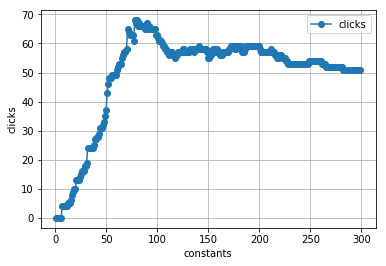

In [39]:
b = const[['clicks','constants']]
b = b.astype(float)
fig,ax1 = plt.subplots()
ax1.plot(b.constants,b.clicks,marker='o')
ax1.set_xlabel('constants')
ax1.set_ylabel('clicks')
fig.savefig('constant.PNG', dpi=200)
plt.legend()
plt.grid()
plt.show()

In [40]:
const.iloc[np.where(const.clicks == const.clicks.max())[0]]

,constants,impressions,costs,clicks,CTR
77,78,146865.0,6250043.0,68,0.0463
79,80,145917.0,6250027.0,68,0.0466


# Random bidding

In [41]:
from random import randrange


In [42]:
def random_bidding(upper):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
    
    for click,pay_price in validationdata[['click','payprice']].values:  
        rand_no = randrange(upper)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost

In [43]:
random = pd.DataFrame()
random['upper'] = np.arange(1,300,1)
random['upper']

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
269    270
270    271
271    272
272    273
273    274
274    275
275    276
276    277
277    278
278    279
279    280
280    281
281    282
282    283
283    284
284    285
285    286
286    287
287    288
288    289
289    290
290    291
291    292
292    293
293    294
294    295
295    296
296    297
297    298
298    299
Name: upper, Length: 299, dtype: int64

In [45]:
im = []
click = []
costs = []
for upper in random['upper']:
    [imps, clicks, cost] = random_bidding(upper)
    im.append(imps)
    click.append(clicks)
    costs.append(cost)
random['impressions'] = im
# random.impressions = random.impressions.astype(int)
random['total_spend'] = costs
random['clicks'] = click
random['CTR'] = (random.clicks/random.impressions * 100).round(4).astype(str)

In [46]:
random

,upper,impressions,total_spend,clicks,CTR
0,1,0.0,0.0,0,nan
1,2,43.0,0.0,0,0.0
2,3,151.0,100.0,0,0.0
3,4,309.0,363.0,0,0.0
4,5,431.0,581.0,0,0.0
5,6,723.0,1541.0,0,0.0
6,7,1765.0,6436.0,0,0.0
7,8,2740.0,11211.0,0,0.0
8,9,3725.0,16493.0,0,0.0
9,10,4632.0,21662.0,3,0.0648


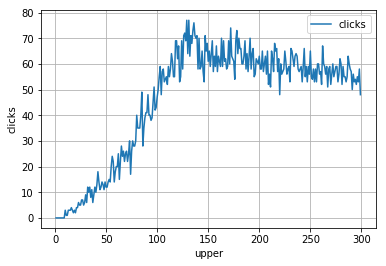

In [60]:
c = random[['clicks','upper']]
c = c.astype(float)
fig,ax1 = plt.subplots()
ax1.plot(c.upper,c.clicks)
ax1.set_xlabel('upper')
ax1.set_ylabel('clicks')
fig.savefig('upper.PNG', dpi=200)
plt.legend()
plt.grid()
plt.show()

In [50]:
random.iloc[np.where(random.clicks == random.clicks.max())[0]]

,upper,impressions,total_spend,clicks,CTR
128,129,141565.0,5928035.0,77,0.0544
130,131,143098.0,6047657.0,77,0.0538


In [51]:
def random_bidding2(lower):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
    
    for click,pay_price in validationdata[['click','payprice']].values:  
        rand_no = randrange(lower,300,1)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost

In [52]:
random2 = pd.DataFrame()
random2['lower'] = np.arange(1,300,1)
random2['lower']

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
269    270
270    271
271    272
272    273
273    274
274    275
275    276
276    277
277    278
278    279
279    280
280    281
281    282
282    283
283    284
284    285
285    286
286    287
287    288
288    289
289    290
290    291
291    292
292    293
293    294
294    295
295    296
296    297
297    298
298    299
Name: lower, Length: 299, dtype: int64

In [53]:
im = []
click = []
costs = []
for lower in random2['lower']:
    [imps, clicks, cost] = random_bidding2(lower)
    im.append(imps)
    click.append(clicks)
    costs.append(cost)
random2['impressions'] = im
# random.impressions = random.impressions.astype(int)
random2['total_spend'] = costs
random2['clicks'] = click
random2['CTR'] = (random2.clicks/random2.impressions * 100).round(4).astype(str)

In [54]:
random2

,lower,impressions,total_spend,clicks,CTR
0,1,101149.0,6250016.0,56,0.0554
1,2,101185.0,6250008.0,55,0.0544
2,3,101243.0,6250061.0,53,0.0523
3,4,101129.0,6250061.0,53,0.0524
4,5,101102.0,6250029.0,53,0.0524
5,6,101246.0,6250093.0,56,0.0553
6,7,101014.0,6250013.0,53,0.0525
7,8,100807.0,6250074.0,55,0.0546
8,9,101020.0,6250027.0,53,0.0525
9,10,100987.0,6250151.0,57,0.0564


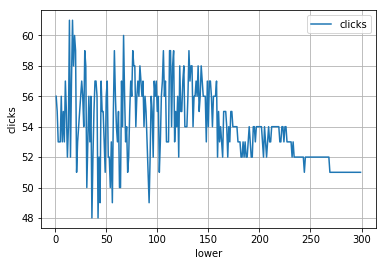

In [59]:
d = random2[['clicks','lower']]
d = d.astype(float)
fig,ax1 = plt.subplots()
ax1.plot(d.lower,d.clicks)
ax1.set_xlabel('lower')
ax1.set_ylabel('clicks')
fig.savefig('lower.PNG', dpi=200)
plt.legend()
plt.grid()
plt.show()

In [56]:
random2.iloc[np.where(random2.clicks == random2.clicks.max())[0]]

,lower,impressions,total_spend,clicks,CTR
13,14,100948.0,6250027.0,61,0.0604
16,17,100664.0,6250034.0,61,0.0606
